In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Practice with method (without analysis)

In [2]:
df = pd.DataFrame({
    'Клиент id': [9002, 6722, 8799, 8737, 5208],
    'Пол': [1, 1, 1, 0, 0],
    'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
    'Возраст': [63, 54, 62, 54, 37]
})

In [3]:
df = df.rename(columns={
    'Клиент id': 'client_id',
    'Пол': 'sex',
    'Благосостояние': 'wealth',
    'Возраст': 'age'
})
df.columns

Index(['client_id', 'sex', 'wealth', 'age'], dtype='object')

In [4]:
medium_35 = df[(df['wealth'] == 'medium') & (df['age'] > 35)]
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [5]:
df['older_than_30'] = df['age'] > 30
df.head()

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [6]:
unique_num = df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [7]:
df_2 = pd.DataFrame({
    'client_id': [5208, 9581, 7250, 8619, 6573],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
})
df_2

,client_id,amount,date
0,5208,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [8]:
full_data = df.merge(df_2, how='inner', on='client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,5208,0,medium,37,True,42331,1585425830


In [9]:
def read_n_agg(path_to_file):
    df = pd.read_csv(path_to_file, sep=';')
    return df.groupby('company').agg({'income': 'mean'})

# Analysis pickups

**Data**: The work uses a synthetic dataset that simulates taxi rides in Peru (Lima).
The data is generated for educational purposes and reflects the actual structure of the product logs.

**Target**: To study the main characteristics of the dataset and identify patterns for them, the specifics of demand and ways to increase it

Analysis tasks:
- Familiarize yourself with the structure of the dataset
- Which platforms are leading in orders
- How are customer ratings distributed to drivers and vice versa
- Use graphs to visualize data

In [ ]:
parse_date_columns = ['start_at', 'end_at', 'arrived_at']

df = pd.read_csv('../../../data/01_module/03_part/taxi_hw.csv', parse_dates=parse_date_columns,
                  sep=',', encoding='utf-8')

### Preprocessing data

In [11]:
rows, columns = df.shape
print(f'Rows: {rows}, columns: {columns}')
df.head()

Rows: 1000, columns: 19


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,1,103,19,60,shared,asap,2024-01-21 00:10:00,-12.003837,-76.943590,2024-01-29 14:14:00,-11.948312,-77.031748,completed,-12.010270,-76.866081,2024-01-01 21:33:00,web,4.0,1.0
1,2,271,18,151,standard,reserved,2024-01-16 20:00:00,-12.132198,-76.885467,2024-01-26 08:20:00,-11.920275,-77.007623,completed,-12.043333,-76.895278,2024-01-16 14:03:00,ios,5.0,4.0
2,3,107,1,31,premium,asap,2024-01-29 22:52:00,-12.179610,-77.037957,2024-01-10 12:28:00,-11.915551,-77.049475,failed,-11.833809,-77.068362,2024-01-28 14:05:00,web,3.0,5.0
3,4,72,78,5,premium,reserved,2024-01-07 21:40:00,-11.952988,-77.198917,2024-01-22 09:40:00,-12.179214,-77.054724,completed,-12.149755,-76.986417,2024-01-13 21:55:00,ios,1.0,2.0
4,5,189,115,162,premium,delayed,2024-01-03 17:24:00,-12.116887,-76.860021,2024-01-21 12:50:00,-11.856101,-77.179093,cancelled,-12.032621,-77.175328,2024-01-07 18:20:00,android,5.0,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        1000 non-null   int64         
 1   user_id           1000 non-null   int64         
 2   driver_id         1000 non-null   int64         
 3   taxi_id           1000 non-null   int64         
 4   icon              1000 non-null   object        
 5   start_type        1000 non-null   object        
 6   start_at          1000 non-null   datetime64[ns]
 7   start_lat         1000 non-null   float64       
 8   start_lon         1000 non-null   float64       
 9   end_at            1000 non-null   datetime64[ns]
 10  end_lat           1000 non-null   float64       
 11  end_lon           1000 non-null   float64       
 12  end_state         1000 non-null   object        
 13  driver_start_lat  1000 non-null   float64       
 14  driver_start_lon  1000 no

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.isna().sum()

journey_id           0
user_id              0
driver_id            0
taxi_id              0
icon                 0
start_type           0
start_at             0
start_lat            0
start_lon            0
end_at               0
end_lat              0
end_lon              0
end_state            0
driver_start_lat     0
driver_start_lon     0
arrived_at           0
source               0
driver_score        46
rider_score         59
dtype: int64

In [15]:
df = df.fillna(0)

### Aggregate rows by platform and find the most popular source

In [16]:
orders_by_source = (
    df.groupby('source', as_index=False)
        .agg({'journey_id': 'count'}) \
        .rename(columns={'journey_id': 'orders'}) \
        .sort_values(by='orders', ascending=False)
)

total = rows
orders_by_source['order_per'] = orders_by_source['orders'] / total * 100

In [17]:
orders_by_source

,source,orders,order_per
0,android,369,36.9
1,ios,318,31.8
2,web,313,31.3


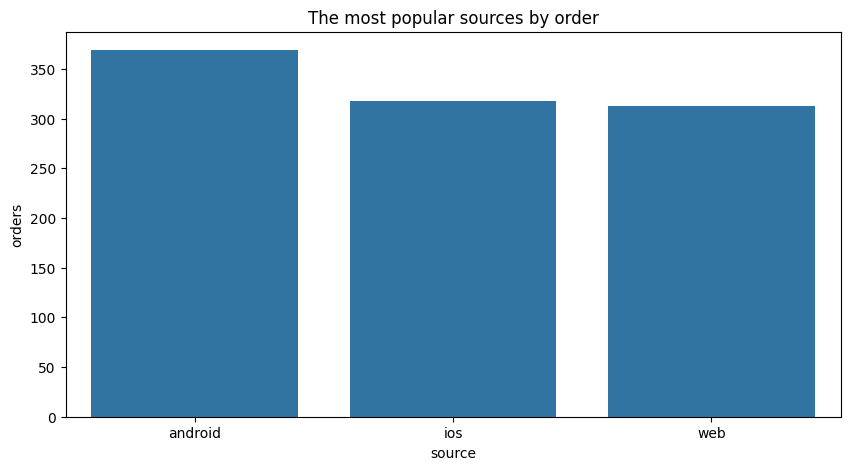

In [18]:
plt.figure(figsize=(10, 5))

sns.barplot(
        data=orders_by_source,
        x=orders_by_source['source'],
        y=orders_by_source['orders'],
        legend=False
)

plt.title('The most popular sources by order')

plt.show()


Android is the most popular source to order pickups

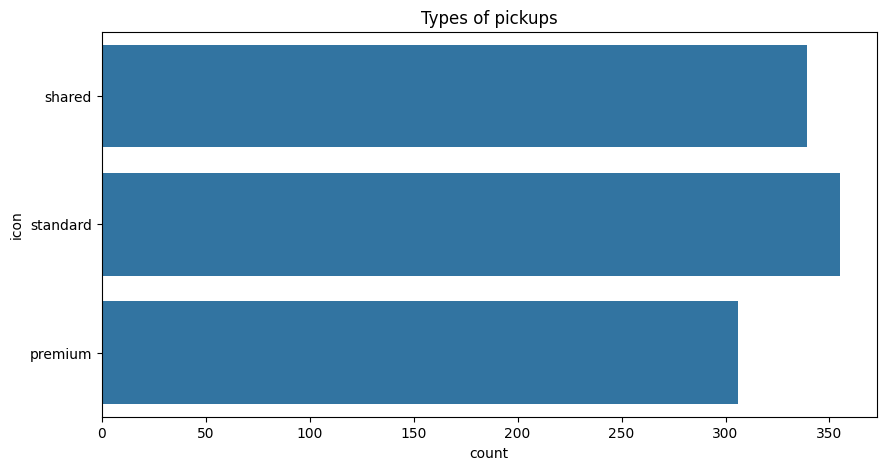

In [19]:
plt.figure(figsize=(10, 5))

sns.countplot(df['icon'])

plt.title('Types of pickups')
plt.show()

The standart is the most popular among icons

### Distribution of the order status (end_state) for each source in the form of a graph

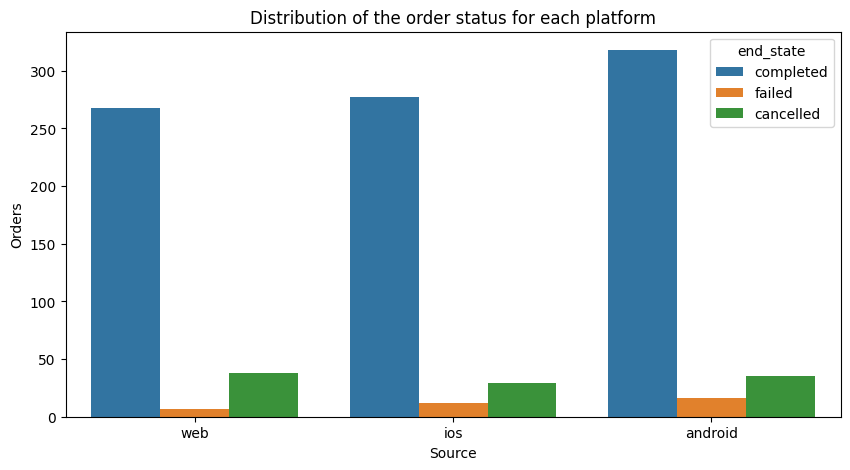

In [20]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df.source, hue=df.end_state)

plt.title('Distribution of the order status for each platform')
plt.xlabel('Source')
plt.ylabel('Orders')

plt.show()

- the WEB platform has the least number of orders that failed
- compared to Android, iOS users cancel orders less
- the biggest difference between cancelled and failed is observed on the WEB

### Distribution of ratings among drivers

In [21]:
driver_score_distr = df.driver_score.value_counts(normalize=True).mul(100).round(2)

In [22]:
driver_score_distr = driver_score_distr.reset_index()

In [23]:
driver_score_counts = driver_score_distr.rename(columns={'proportion': 'percentage'})\
    .sort_values(by='driver_score')

In [24]:
driver_score_counts

,driver_score,percentage
5,0.0,4.6
4,1.0,5.8
3,2.0,10.3
2,3.0,19.5
0,4.0,34.8
1,5.0,25.0


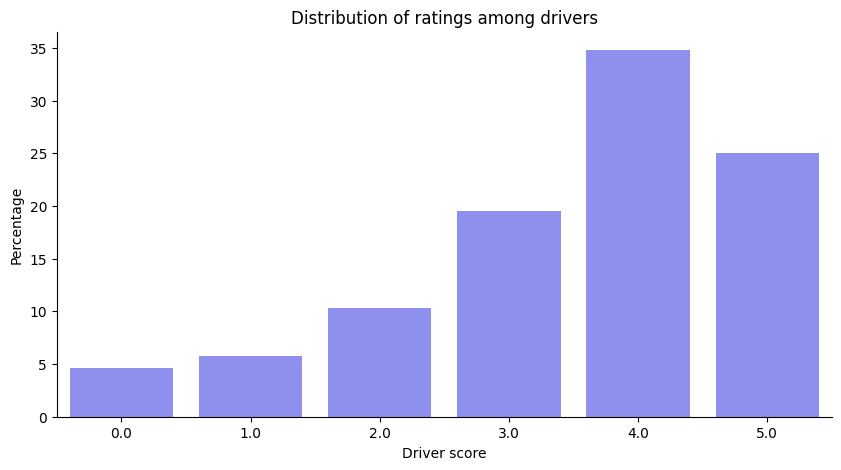

In [25]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    x=driver_score_counts.driver_score,
    y=driver_score_counts.percentage,
    data=driver_score_counts,
    color='blue',
    alpha=0.5
)

ax.set(title='Distribution of ratings among drivers', xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()


- The largest score by percentage is 4.0
- The smallest score by percentage is 1.0

## Distribution of drive ratings among drivers

In [26]:
rider_score_distr = df.rider_score.value_counts(normalize=True).mul(100).round(2)

In [27]:
rider_score_distr = rider_score_distr.reset_index()

In [28]:
rider_score_counts = rider_score_distr.rename(columns={'proportion': 'percentage'}) \
    .sort_values(by='rider_score')

In [29]:
rider_score_counts

,rider_score,percentage
4,0.0,5.9
5,1.0,4.2
3,2.0,8.3
2,3.0,22.0
0,4.0,36.5
1,5.0,23.1


### Distribution of ratings among clients (by drivers)

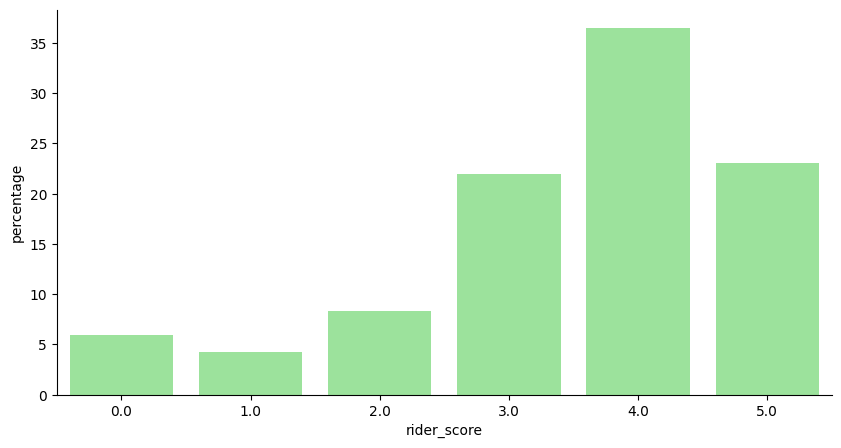

In [30]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=rider_score_counts,
    x=rider_score_counts.rider_score,
    y=rider_score_counts.percentage,
    color='lightgreen'
)

ax.set(title='Distribution of ratings among clients', xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show()

- clients set 1.0 more than drivers
- drivers set 4.0 client more 35% percentage